### Empoyee dataset
Dans cette analyse, notre objectif est d'identifier les raisons et les caractéristiques susceptibles d'influencer les départs des employés, afin d'optimiser la satisfaction au travail.
Notre variable cible sera donc "Leave or Not".

### Présentation des variables
Education : Les qualifications éducatives des employés, y compris le diplôme, l'établissement et le domaine d'étude.

Joining Year : Année d'entrée dans l'entreprise : année d'entrée dans l'entreprise de chaque salarié, avec indication de son ancienneté.

City : Lieu ou ville où chaque employé est basé ou travaille.

Payment Tier : Catégorisation des employés en différents niveaux de salaire.

Âge : L'âge de chaque employé, ce qui permet d'obtenir des informations démographiques.

Gender : Identité sexuelle des employés, ce qui favorise l'analyse de la diversité.

Ever Benched : indique si un employé a déjà été temporairement privé de travail

Experience in Current Domain : Nombre d'années d'expérience des salariés dans leur domaine actuel.

Leave or Not : Si les employés quittent l'entreprise

### Importation des librairies nécessaires 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

### Analyse général du fichier

In [2]:
df = pd.read_csv(r"C:\Users\belli\OneDrive\Bureau\Selflearning\Data\Kaggle\Employeedataset\Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Après analyse des données, les résultats révèlent que l'âge moyen des salariés est de 29,39 ans, avec une fourchette allant de 22 à 41 ans. En moyenne, ils ont rejoint l'entreprise en 2015. En outre, il est remarquable que la moitié des salariés possèdent plus de 3 ans d'expérience dans ce domaine spécifique.

Concernant les départs, il est constaté qu'environ un tiers des salariés ont pris la décision de quitter l'entreprise, ce qui souligne un aspect crucial de la rétention du personnel.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Nous disposons de quatre variables qualitatives : le niveau d'éducation, la ville de travail de l'employé, le genre de l'employé, et si l'employé a déjà été temporairement privé de travail.

Nous avons également cinq variables quantitatives : l'année d'embauche de l'employé, la catégorisation des employés en différents niveaux de salaire, l'âge, le nombre d'années d'expérience, et si l'employé quitte l'entreprise.

In [5]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [6]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

Chaque variable quantitative possède plusieurs réponses uniques.

In [7]:
df["JoiningYear"].unique()

array([2017, 2013, 2014, 2016, 2015, 2012, 2018], dtype=int64)

In [8]:
df["Education"].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [9]:
df["City"].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [10]:
df["PaymentTier"].unique()

array([3, 1, 2], dtype=int64)

In [11]:
df["ExperienceInCurrentDomain"].unique()

array([0, 3, 2, 5, 1, 4, 7, 6], dtype=int64)

Nous allons vérifier si dans nous avons des données nulles. En effet, la présence de valeurs nulles peut indiquer des problèmes de qualité des données, tels que des erreurs de saisie ou des données manquantes.

In [12]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

Aucune valeur nulle n'est détectée dans le jeu de données, cela indique une bonne qualité des données et simplifie le processus d'analyse. Cette constatation renforce la fiabilité des résultats obtenus et facilite la transparence de l'analyse.

In [13]:
df.shape

(4653, 9)

### Analyses univariées

Text(0.5, 1.0, "Pourcentage des employés quittant l'entreprise")

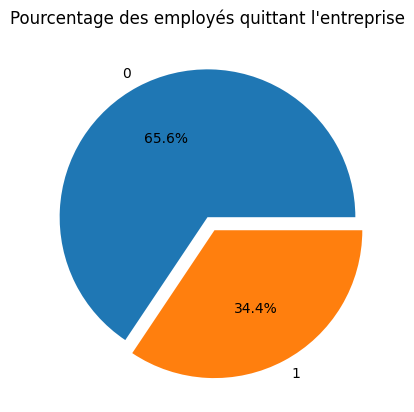

In [40]:
plt.pie(x=df.LeaveOrNot.value_counts(),labels=df.LeaveOrNot.value_counts().index,autopct="%1.1f%%",explode=[0,0.1])
plt.title("Pourcentage des employés quittant l'entreprise")

Un tier des employés ont quitté l'entreprise

Text(0.5, 1.0, "Niveaux d'études des employés")

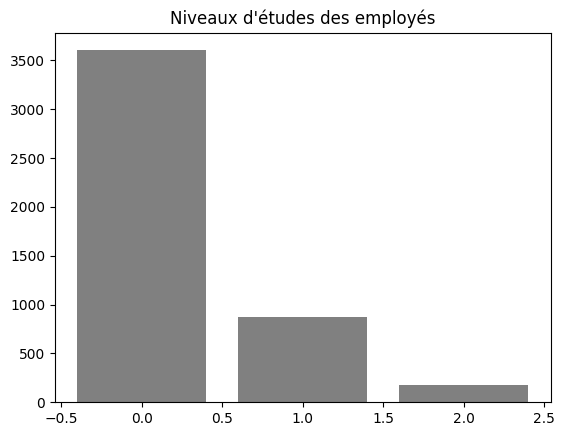

In [41]:
plt.bar(df.Education.unique(), df.Education.value_counts(),color='grey')
plt.title("Niveaux d'études des employés")

La plupart des employés ont obtenu un diplôme de bachelor, suivis de certains qui ont poursuivi leurs études pour obtenir un master.

Text(0.5, 1.0, "Années d'entrées en entreprise")

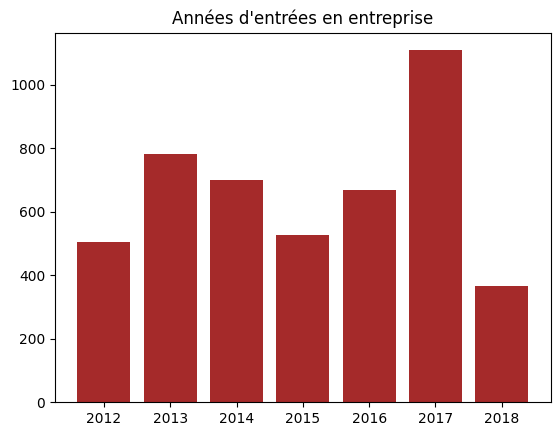

In [42]:
plt.bar(df.JoiningYear.unique(), df.JoiningYear.value_counts(),color='brown')
plt.title("Années d'entrées en entreprise")

Text(0.5, 1.0, 'Âge des employés')

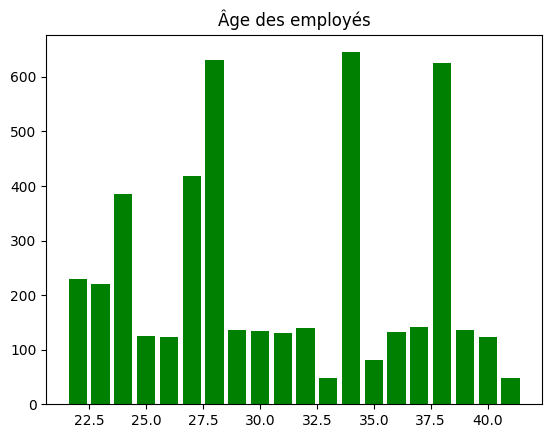

In [43]:
plt.bar(df.Age.unique(),df.Age.value_counts(),color='green')
plt.title("Âge des employés")

La majorité des employés ont environ 28, 34 et 38 ans.

Text(0.5, 1.0, 'Pourcentage EverBenched')

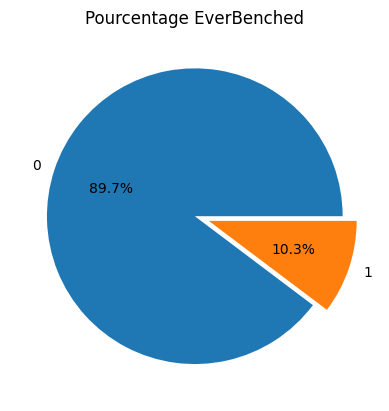

In [44]:
plt.pie(x=df.EverBenched.value_counts(),labels=df.EverBenched.value_counts().index,autopct="%1.1f%%",explode=[0,0.1])
plt.title("Pourcentage EverBenched")

Text(0.5, 1.0, 'Ratio des genres')

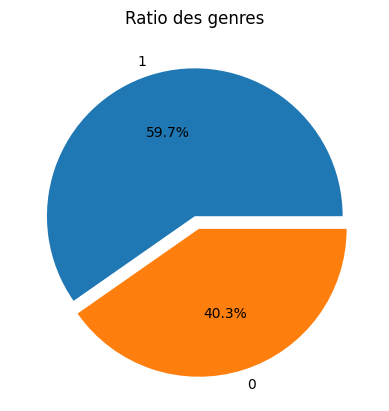

In [45]:
plt.pie(x=df.Gender.value_counts(),labels=df.Gender.value_counts().index,autopct="%0.1f%%",explode=[0,0.09])
plt.title("Ratio des genres")

L'entreprise présente une répartition relativement équilibrée entre les genres, bien que les hommes prédominent légèrement parmi les employés.

Text(0.5, 1.0, "Année d'expérience dans le domaine")

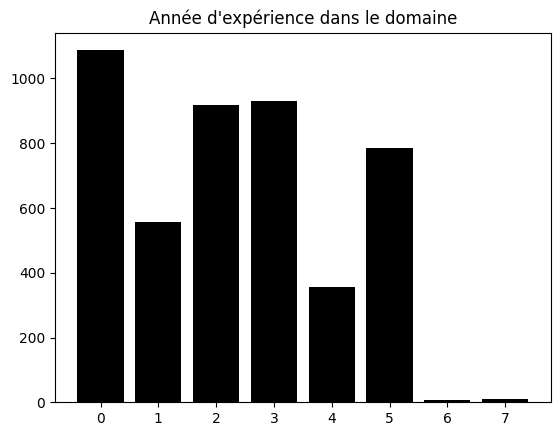

In [46]:
plt.bar(df.ExperienceInCurrentDomain.unique(),df.ExperienceInCurrentDomain.value_counts(),color='black')
plt.title("Année d'expérience dans le domaine")

### Encodage des étiquettes pour les colonnes catégorielles

In [21]:
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df['City']=le.fit_transform(df.City)
df['Gender']=le.fit_transform(df['Gender'])
df['EverBenched']=le.fit_transform(df['EverBenched'])
df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
5,0,2016,0,3,22,1,0,0,0
6,0,2015,1,3,38,1,0,0,0
7,0,2016,0,3,34,0,0,2,1
8,0,2016,2,3,23,1,0,1,0
9,1,2017,1,2,37,1,0,2,0


In [22]:
target=df['LeaveOrNot']
X=df.drop(['LeaveOrNot'],axis='columns')
y=target

### Tableau de corrélation

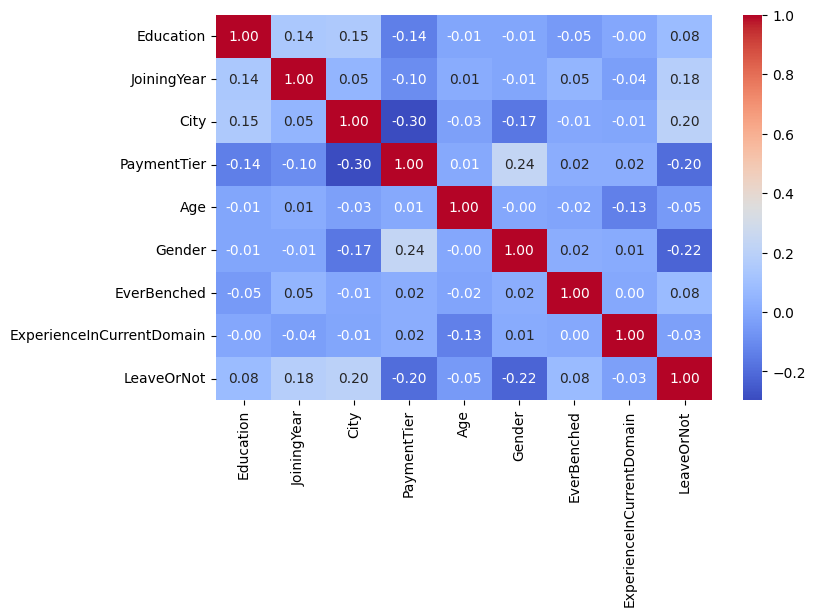

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

### Analyses plurivariées

<Axes: xlabel='JoiningYear', ylabel='Count'>

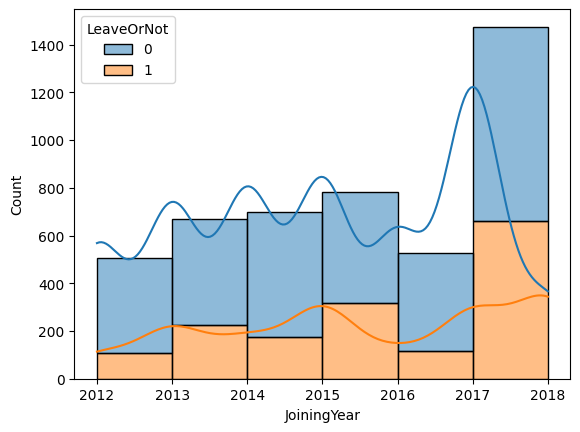

In [24]:
sns.histplot(data=df, x=df["JoiningYear"],hue="LeaveOrNot", kde=True, bins=6, multiple="stack")

Nous observons une importance significative du taux de départ des employés ayant rejoint l'entreprise en 2014 et en 2017. Il est possible de supposer que ce taux pourrait augmenter pour les employés ayant rejoint l'entreprise après 2018.

<Axes: xlabel='PaymentTier', ylabel='Count'>

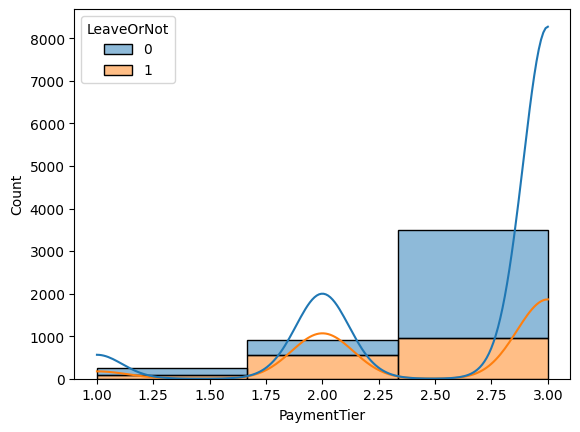

In [25]:
sns.histplot(data=df, x=df["PaymentTier"],hue="LeaveOrNot", kde=True, bins=3, multiple="stack")

Dans cette analyse, lorsque la fourchette salariale se situe entre 2,20 et 3,00, un plus grand nombre de personnes sont enclines à rester au sein de l'entreprise.

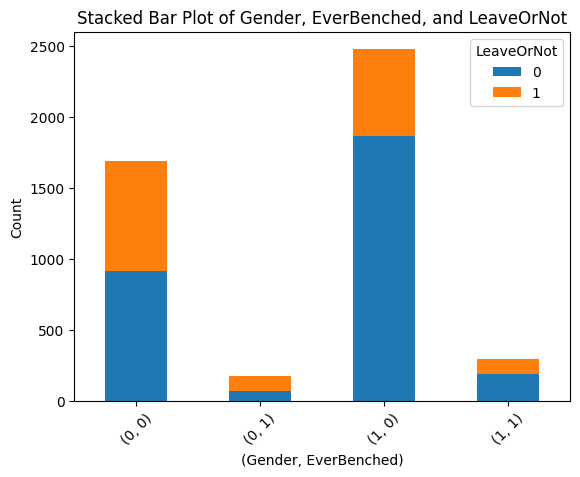

In [27]:
x=pd.crosstab([df.Gender,df.EverBenched],df.LeaveOrNot)
x.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender, EverBenched, and LeaveOrNot')
plt.xlabel('(Gender, EverBenched)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

Parmi les femmes de ces données, un nombre considérable de celles qui n'ont pas été temporairement privées de travail ont quitté l'entreprise, tandis que près de la moitié de celles qui l'ont été ont également choisi de partir.

# Diviser les données en deux ensembles : l'ensemble de formation et l'ensemble de test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr=LogisticRegression(max_iter=4000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [29]:
len(X_test)

1396

In [30]:
len(X_train)

3257

In [31]:
lr.score(X_test,y_test)

0.7213467048710601

In [32]:
rf=RandomForestClassifier()

hyper_params = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "n_estimators":[100,300, 400, 500, 600],
                "criterion":["gini"]}
    
model=GridSearchCV(rf, hyper_params, cv=5, scoring="f1_macro", n_jobs=-1)
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
print(model.best_estimator_)

RandomForestClassifier(max_features=10, min_samples_leaf=10,
                       min_samples_split=3, n_estimators=300)


In [33]:
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]
accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")

Accuracy:[0.8732091690544412]
F1-Score:[0.7924970691676436]
Precision:[0.7100840336134454]
Recall:[0.896551724137931]


L'accuracy est d'environ 87.32%, ce qui signifie que le modèle prédit correctement la classe des employés (partants ou restants) dans environ 87.32% des cas.

Un F1-score de 0.79 indique une bonne harmonie entre la précision et le rappel.

Une précision de 0.71 signifie que 71.01% des employés prédits comme partants le sont effectivement.

Un rappel de 0.90 indique que 89.65% des employés partants sont correctement identifiés par le modèle.

In [34]:
rf.fit(X_train, y_train)
importances = rf.feature_importances_
for i, importance in enumerate(importances):
    print(f"Feature {i+1}: {importance}")

Feature 1: 0.08689520432329774
Feature 2: 0.3210360564000266
Feature 3: 0.1142443485891433
Feature 4: 0.0983169712194411
Feature 5: 0.17758403381366808
Feature 6: 0.09259704788140055
Feature 7: 0.019679852745376543
Feature 8: 0.08964648502764619


Les valeurs de l'output représentent l'importance relative des différentes caractéristiques (features) dans le modèle de classification. Plus cette valeur est élevée, plus la caractéristique est considérée comme importante pour la prédiction des résultats. Les valeurs sont normalisées de telle sorte que la somme de toutes les importances soit égale à 1.

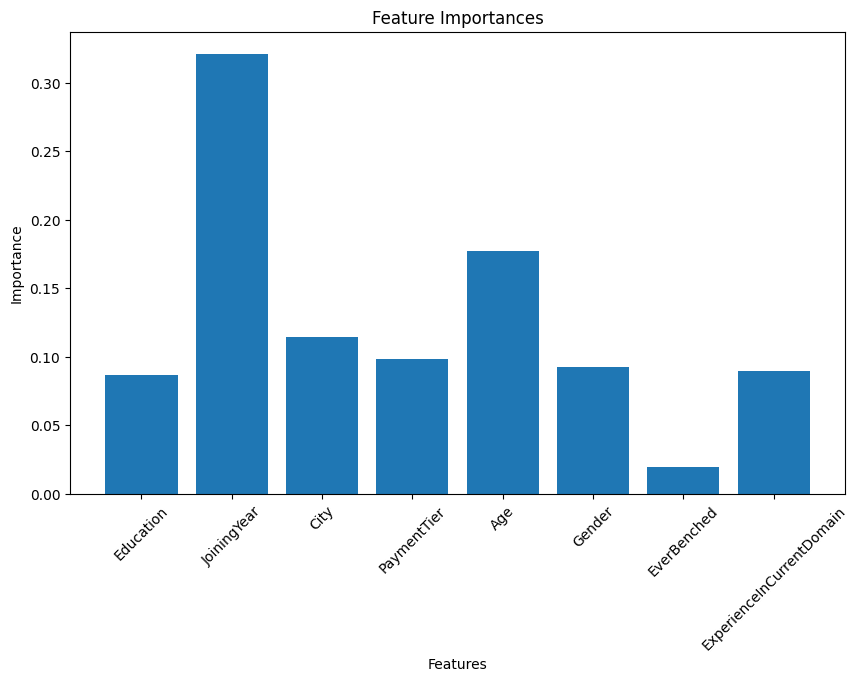

In [35]:
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances, tick_label=X_train.columns)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

Comme illustré sur le graphique, les données suggèrent que l'année d'embauche, l'âge et la ville de travail des employés sont des facteurs prédictifs potentiels de leur départ. En tenant compte de ces variables, il est possible d'anticiper les départs éventuels et d'agir en conséquence.